# Regressão logística

Nesta parte será construido um modelo de regressão logística para prever se um tumor é benígno ou malígno. Suponha que você já tenha os dados de atributos que foram extraídos das imagens de tomograficas. Você deseja determinar a chance do tumor ser maligno ou benígno baseado no tamanho do tumor e na idade do paciente. Sua tarefa é construir um modelo de classificação que estima a probabilidade de um tumor ser maligno ou benígno baseado nos dados históricos dos pacientes

In [1]:
#bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Leitura dos dados

- X contém o tamanho dos tumores dados em milímetros e a idade 
- y é a variável categórica seja 
    - y=1=malígno
    - y=0=benigno

In [2]:
np.random.randint(low=20, high=50, size=20)

array([22, 29, 33, 43, 37, 29, 41, 33, 25, 27, 35, 48, 25, 31, 31, 24, 25,
       37, 38, 46])

In [3]:
maligno = pd.DataFrame()
maligno['tamanho_tumor'] = np.random.randint(low=20, high=50, size=20)
maligno['idade'] = np.random.randint(low=30, high=50, size=20)
maligno['y'] = 1

In [8]:
maligno

,tamanho_tumor,idade,y
0,39,31,1
1,45,44,1
2,36,43,1
3,30,31,1
4,41,39,1
5,25,37,1
6,45,30,1
7,20,46,1
8,30,32,1
9,37,41,1


In [4]:
benigno = pd.DataFrame()
benigno['tamanho_tumor'] = np.random.randint(low=20, high=35, size=20)
benigno['idade'] = np.random.randint(low=15, high=35, size=20)
benigno['y'] = 0

In [9]:
benigno

,tamanho_tumor,idade,y
0,25,28,0
1,23,32,0
2,20,26,0
3,30,19,0
4,34,33,0
5,33,19,0
6,33,33,0
7,31,16,0
8,30,25,0
9,24,20,0


In [6]:
df = pd.concat([maligno, benigno], axis=0)
df.head()

,tamanho_tumor,idade,y
0,39,31,1
1,45,44,1
2,36,43,1
3,30,31,1
4,41,39,1


In [7]:
df.describe()

,tamanho_tumor,idade,y
count,40.000000,40.000000,40.00000
mean,31.750000,31.875000,0.50000
std,7.520059,8.228118,0.50637
min,20.000000,16.000000,0.00000
25%,25.750000,25.750000,0.00000
50%,30.500000,32.000000,0.50000
75%,36.000000,35.500000,1.00000
max,48.000000,49.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tamanho_tumor  40 non-null     int32
 1   idade          40 non-null     int32
 2   y              40 non-null     int64
dtypes: int32(2), int64(1)
memory usage: 960.0 bytes


## Visualização de dados

In [15]:
df[df['y']==0]

,tamanho_tumor,idade,y
0,25,28,0
1,23,32,0
2,20,26,0
3,30,19,0
4,34,33,0
5,33,19,0
6,33,33,0
7,31,16,0
8,30,25,0
9,24,20,0


In [11]:
maligno = df[df['y']==1]
benigno = df[df['y']==0]

In [12]:
maligno

,tamanho_tumor,idade,y
0,39,31,1
1,45,44,1
2,36,43,1
3,30,31,1
4,41,39,1
5,25,37,1
6,45,30,1
7,20,46,1
8,30,32,1
9,37,41,1


In [13]:
benigno

,tamanho_tumor,idade,y
0,25,28,0
1,23,32,0
2,20,26,0
3,30,19,0
4,34,33,0
5,33,19,0
6,33,33,0
7,31,16,0
8,30,25,0
9,24,20,0


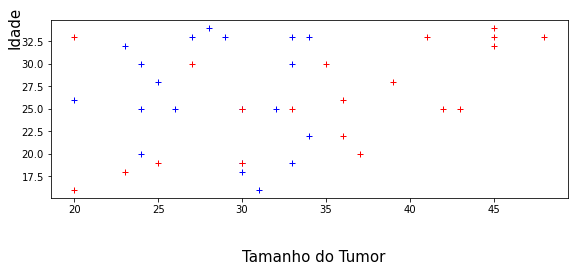

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(benigno['tamanho_tumor'],benigno['idade'], '+b')
ax.plot(maligno['tamanho_tumor'],benigno['idade'], '+r')
plt.text(30,8, 'Tamanho do Tumor', fontdict={'size': 15})
plt.text(16,32,'Idade', fontdict={'size':15}, rotation=90)
plt.tight_layout()
fig.savefig(r'C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\materiais-de-apoio-pandas - Curso Edu\materiais-apoio-regressao-logistica\materiais-apoio')

## Hipotese de regressão logística

$$ h_\theta(x) = g(\theta^T x)$$

onde a função $g$ é uma função sigmoidal dada por: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

## Criando um modelo

In [21]:
from sklearn.linear_model import LogisticRegression

In [33]:
x = df[['tamanho_tumor', 'idade']]
y = df['y']

In [28]:
model = LogisticRegression()

## Treinamento do modelo

In [34]:
model.fit(x,y)

LogisticRegression()

In [35]:
print(model.coef_)
print(model.intercept_)

[[0.28501494 0.57928936]]
[-27.69113636]


In [38]:
p = model.predict(x)

## Avaliando os resultados

In [40]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [41]:
## acurácia
metrics.accuracy_score(y,p)

0.9

In [42]:
## Matriz de confusão
metrics.confusion_matrix(y,p)

array([[18,  2],
       [ 2, 18]], dtype=int64)

In [43]:
## acurácia
metrics.precision_score(y,p)

0.9

In [44]:
## recall
metrics.recall_score(y,p)

0.9

In [45]:
## f1-score
metrics.f1_score(y,p)

0.9

##### Relatório de Classificação

In [46]:
print(classification_report(y,p))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

